<a href="https://colab.research.google.com/github/AlexAlexeyuk/Alexander.Alexeyuk/blob/master/generation3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [155]:
import pandas as pd
import numpy as np
!pip install sdv

In [156]:
import matplotlib.pyplot as plt


In [157]:
df  = pd.read_csv('/content/Proc_data_1.csv')

In [158]:

df = df.drop(['Hemoglobin','Unnamed: 0', 'Unnamed: 0.1',
         'ID', 'Diagnosis', 
         'COVID-19'], axis=1)

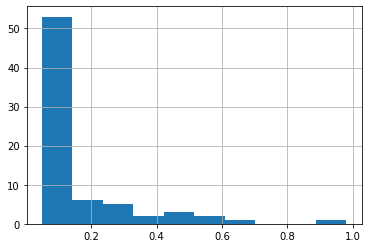

In [ ]:
df['Initial_Procalcitonine'].hist()


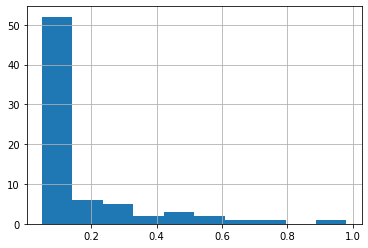

In [ ]:
df['Max_Procalcitonine'].hist()

In [160]:
# переводим наши даты в формат пандас
for i in ['Birthday', 'Admission', 'Discharge']:
  df[i] = pd.to_datetime(df[i], format = "%d:%m:%Y")
# длительность госпитализации = выписка - поступление
df["duration"] = (df['Discharge'] - df['Admission']).dt.days

# возраст пациента рассчитаем: день рождения - поступление = дни и целочисленно делим на 356
df["Age"] = ((df['Admission'] - df['Birthday']).dt.days) // 356
data = df.drop(['Birthday', 'Admission', 'Discharge'], axis=1)

In [161]:
from sdv.tabular import GaussianCopula
model = GaussianCopula()
model.fit(df)
new_data_1 = model.sample(400)
new_data_1.head()

/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr

,Max_Platlets,Min_Platlets,Max_Leucocytes,Min_Leucocytes,Max_Creatinine,Min_Cratinine,Gender,initial_CRP,Max_CRP,Treatment,Birthday,Admission,Discharge,Pneumonia,Severity,IHD,COPD,Bronchial_asthma,Obesity,Diabetes,RF,ALT,AST,Initial_Procalcitonine,Max_Procalcitonine,duration,Age
0,285.172818,285.242534,11.668202,11.665753,101.266048,83.635372,male,0.498560,4.163077,"цефтриаксон, глюкоза, вит. с, фрагмин, омепра...",1952-03-28,2021-01-19,2021-01-23,1,0,1,0,0,0,0,-0.416142,45.861298,7.886802,0.219611,0.157277,9,68
1,350.908044,350.874077,11.678031,11.678783,105.127198,70.393810,male,13.458354,1.293862,"дексаметазон, гепарин, фамотидин, парацетамол...",1968-01-16,2020-08-23,2020-11-24,1,1,0,0,0,0,0,1.641096,10.310594,0.215320,0.149311,0.138303,25,43
2,223.487350,223.519619,11.377648,11.379763,107.204905,74.944780,male,5.565566,11.944603,"цефтриаксон, дексаметазон, гепарин, парацетам...",1979-09-14,2020-11-17,2021-01-29,1,1,-1,0,0,0,0,2.822994,71.466698,26.065321,0.068476,0.064911,25,42
3,360.900169,360.888965,11.797338,11.797091,112.910427,66.523662,male,69.837857,34.639941,"цефтриаксон, дексаметазон, эноксапарин, аце...",1956-12-09,2020-09-04,2021-01-14,1,1,0,0,0,0,0,1.688467,45.306939,19.320531,0.314717,0.264842,19,69
4,215.815522,215.754058,9.334102,9.331187,113.331670,77.589488,male,2.276815,16.459769,"фраксипарин , аспикард, цефтриаксон, лизинопри...",1946-12-18,2021-03-30,2021-02-01,1,0,0,0,0,0,0,1.887184,93.218223,73.421171,0.147366,0.108558,14,64


In [162]:
new_data_1 = new_data_1[new_data_1['Max_Procalcitonine']>.4]

In [170]:
new_data_1.shape

(20, 27)

In [ ]:
# from sdv.tabular import GaussianCopula
# model_ = GaussianCopula()
# model_.fit(data)
# new_data_1_ = model.sample(400)
# new_data_1_.head()

/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr

,Unnamed: 0,Unnamed: 0.1,ID,Max_Platlets,Min_Platlets,Max_Leucocytes,Min_Leucocytes,Hemoglobin,Max_Creatinine,Min_Cratinine,Gender,initial_CRP,Max_CRP,Treatment,Birthday,Admission,Discharge,Diagnosis,COVID-19,Pneumonia,Severity,IHD,COPD,Bronchial_asthma,Obesity,Diabetes,RF,ALT,AST,Initial_Procalcitonine,Max_Procalcitonine
0,305,305,8519.755799,451.629501,451.646182,11.625356,11.629526,[164. 164. 164.],114.370263,136.409924,male,1.280283,13.917055,"дексаметазон, кпс, аспикард, лозартон аторвас...",22:06:1955,13:11:2020,23:07:2020,инфекция ср ст тяжэт 231220 м пол джи отрвнего...,0,1,0,1,0,0,0,0,0.849875,102.317346,58.432519,0.351636,0.342467
1,213,213,3622.215468,-30.119440,-30.109946,8.045245,8.046350,[133. 134. 129. 125. 135.],107.646465,67.277971,male,190.090552,210.626175,None,15:02:1940,17:12:2020,01:02:2021,в 342 тяжёлая коронавирусная инфекция реконвал...,1,1,1,0,0,0,0,0,1.016863,225.779953,87.575656,0.051798,0.051837
2,313,313,4108.305344,68.853604,68.925117,7.311479,7.305042,[145.],106.341133,62.310109,female,78.447109,132.774568,"цефтриаксон, дексаметазон, гидроксихлорохин,...",10:01:1952,20:12:2020,29:12:2020,в 342 тяжёлая коронавирусная инфекцияэт на ат ...,1,1,1,1,0,0,0,0,0.257570,95.480911,48.525126,0.054781,0.052865
3,273,273,5785.791005,220.689792,220.657121,7.101137,7.101667,[117. 122. 115. 116. 121.],123.214871,101.391750,female,8.878393,46.133046,"цефтриаксон, левофлоксацин, дексаметазон, гепа...",12:07:1981,17:12:2020,31:12:2020,в 34 инфекция вызванная covid 19 пцр положит о...,1,1,0,0,0,0,0,0,1.863413,141.409456,141.105463,0.053384,0.050479
4,302,302,1757.841858,464.747100,464.725307,10.876287,10.872180,[103. 144. 146.],88.820492,65.477755,female,104.328120,159.138097,"левофлоксацин, амброксол, аспикард, омепразол...",20:07:1957,06:01:2021,15:01:2021,b342 среднетяжёлая короновирусная sarscov2 ig ...,1,1,1,1,0,0,0,0,1.596056,138.405256,48.728331,0.051602,0.050981


In [163]:
from sdv.tabular import CTGAN

model2 = CTGAN()
model2.fit(df)

/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:267: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/usr/local/lib/python3.6/dist-pac

In [171]:
new_data_2 = model2.sample(440)

In [173]:
new_data_2.shape

(440, 27)

In [172]:
l = df[df['Max_Procalcitonine']>.4]

In [174]:
l.shape

(8, 27)

In [177]:
new_data_2= new_data_2.append(new_data_1)

In [175]:
new_data_2= new_data_2.append(l)

In [176]:
new_data_2.shape

(448, 27)

In [ ]:
model2_ = CTGAN()
model2_.fit(data)

/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/usr/local/lib/python3.6/dist-packages/s

In [ ]:
new_data_2_ = model2_.sample(400)

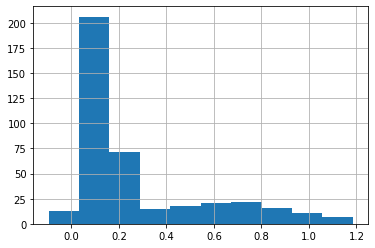

In [ ]:
new_data_2_['Max_Procalcitonine'].hist()

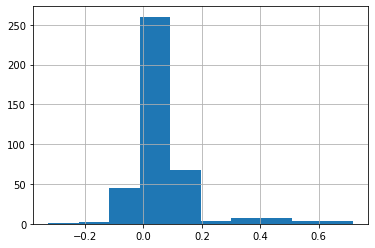

In [ ]:
new_data_2['Max_Procalcitonine'].hist()

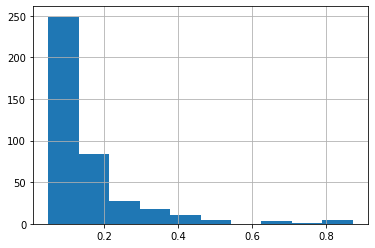

In [ ]:
new_data_1_['Max_Procalcitonine'].hist()

In [ ]:
# переводим наши даты в формат пандас
for i in ['Birthday', 'Admission', 'Discharge']:
  df[i] = pd.to_datetime(df[i], format = "%d:%m:%Y")
# длительность госпитализации = выписка - поступление
df["duration"] = (df['Discharge'] - df['Admission']).dt.days

# возраст пациента рассчитаем: день рождения - поступление = дни и целочисленно делим на 356
df["Age"] = ((df['Admission'] - df['Birthday']).dt.days) // 356
data = df.drop(['Birthday', 'Admission', 'Discharge'], axis=1)
new_data_1['Age'] =  new_data_1['Age'].map(lambda x: x + 10 if x < 10 else x)

KeyError: ignored

In [178]:
new_data_2.columns


Index(['Max_Platlets', 'Min_Platlets', 'Max_Leucocytes', 'Min_Leucocytes',
       'Max_Creatinine', 'Min_Cratinine', 'Gender', 'initial_CRP', 'Max_CRP',
       'Treatment', 'Birthday', 'Admission', 'Discharge', 'Pneumonia',
       'Severity', 'IHD', 'COPD', 'Bronchial_asthma', 'Obesity', 'Diabetes',
       'RF', 'ALT', 'AST', 'Initial_Procalcitonine', 'Max_Procalcitonine',
       'duration', 'Age'],
      dtype='object')

In [179]:

new_data_2['Age'] =  new_data_2['Age'].map(lambda x: x + 10 if x < 10 else x)

In [180]:
dataf = new_data_2.copy()

In [181]:
dataf = dataf.drop([
          "Treatment", 'duration',
          'Birthday', 'Admission', 'Discharge', 
          'Pneumonia', ], axis=1)

In [182]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [183]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [184]:
def ind_ab(x):
  if x > .4:
    return 1
  else:
    return 0

In [185]:
dataf['Ab_ind'] = dataf['Max_Procalcitonine'].apply(ind_ab)

In [186]:
dataf['Ab_ind'].value_counts()

0    417
1     51
Name: Ab_ind, dtype: int64

In [187]:
dataf = dataf.drop(['Unnamed: 0', 'Unnamed: 0.1',
         'ID', 'Diagnosis', 
         'COVID-19', "Treatment"], axis=1)

KeyError: ignored

In [188]:
neg, pos = np.bincount(dataf['Ab_ind'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 468
    Positive: 51 (10.90% of total)



In [189]:
dataf[['Max_Platlets', 'Min_Platlets', 'Max_Leucocytes', 'Min_Leucocytes',
        'Max_Creatinine', 'Min_Cratinine', 'Gender',
       'initial_CRP', 'Max_CRP',  'Severity', 'IHD', 'COPD',
       'Bronchial_asthma', 'Obesity', 'Diabetes', 'RF', 'ALT', 'AST', 'Age',
       'Ab_ind']].describe

<bound method NDFrame.describe of      Max_Platlets  Min_Platlets  Max_Leucocytes  ...         AST  Age  Ab_ind
0      449.046904    402.475034       -9.320955  ...   19.377929   41       0
1      439.659573    299.178356       -0.269779  ...  151.776888   39       1
2      204.530378    323.429806        5.975129  ...   32.774700   63       0
3      502.354509    275.039220       -6.793301  ...   28.492527   82       0
4      513.445945    319.699165     -158.101107  ...   45.412078   37       0
..            ...           ...             ...  ...         ...  ...     ...
287    647.276206    647.381980       20.346838  ...   39.023753   27       1
300    174.388975    174.405045        8.228951  ...   10.539733   51       1
316    546.110987    546.102786       20.162660  ...   31.687748   63       1
321    377.468721    377.387694        6.006213  ...   27.713724   56       1
383    541.318310    541.355211       10.697243  ...    7.495294   70       1

[468 rows x 20 columns]>

In [190]:
cleaned_df = dataf.copy()


In [191]:
cleaned_df['Gender'] = cleaned_df['Gender'].map({'male': 1, 'female': 0})

In [192]:
cleaned_df = cleaned_df.drop(['Initial_Procalcitonine', 'Max_Procalcitonine'], axis=1)

In [193]:
# Use a utility from sklearn to split and shuffle our dataset.
train_df, test_df = train_test_split(cleaned_df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('Ab_ind'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('Ab_ind'))
test_labels = np.array(test_df.pop('Ab_ind'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [194]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (299,)
Validation labels shape: (75,)
Test labels shape: (94,)
Training features shape: (299, 19)
Validation features shape: (75, 19)
Test features shape: (94, 19)


In [195]:
#cleaned_df = cleaned_df.drop(['Initial_Procalcitonine', 'Max_Procalcitonine'], axis=1)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


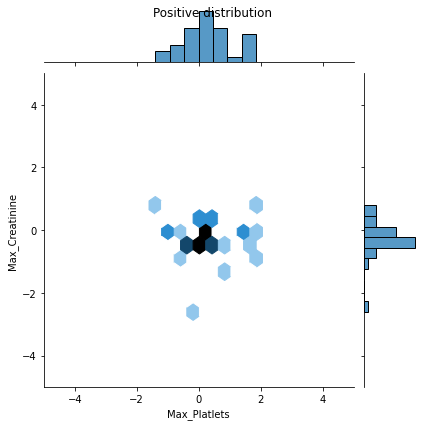

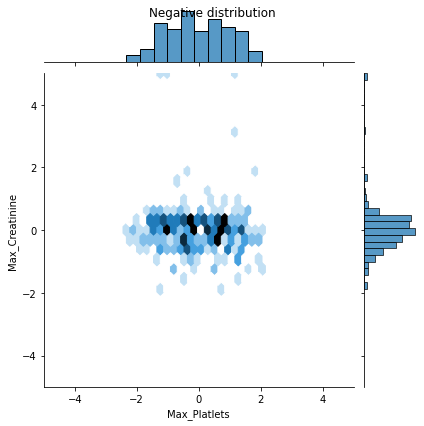

In [196]:
pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_df.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_df.columns)

sns.jointplot(pos_df['Max_Platlets'], pos_df['Max_Creatinine'],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
plt.suptitle("Positive distribution")

sns.jointplot(neg_df['Max_Platlets'], neg_df['Max_Creatinine'],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
_ = plt.suptitle("Negative distribution")

In [197]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [198]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [199]:
model = make_model()
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 16)                320       
_________________________________________________________________
dropout_21 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 17        
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


In [200]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.4025


In [201]:
initial_bias = np.log([pos/neg])
initial_bias

array([-2.10126059])

In [202]:
model = make_model(output_bias=initial_bias)
model.predict(train_features[:10])

array([[0.2956523 ],
       [0.43620244],
       [0.39280725],
       [0.23189557],
       [0.3435849 ],
       [0.13597894],
       [0.22240916],
       [0.53199184],
       [0.15631711],
       [0.21102306]], dtype=float32)

In [203]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.5109


In [204]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [205]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [206]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [207]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

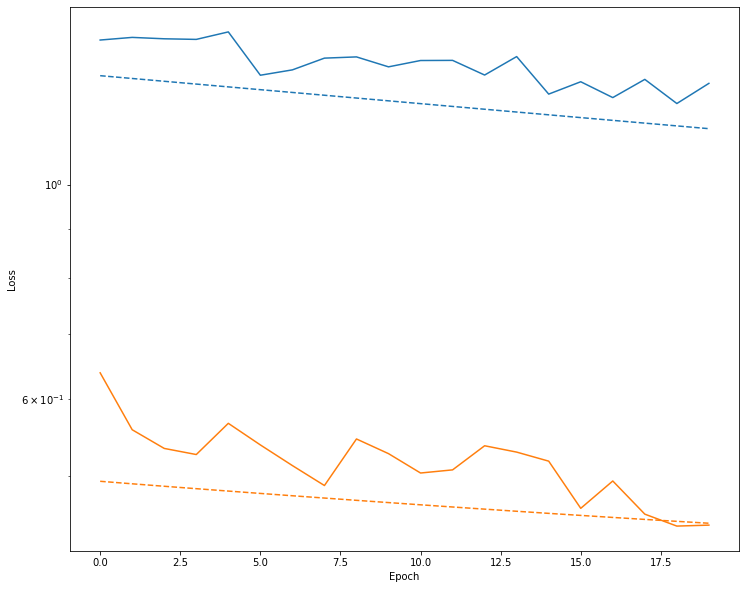

In [208]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [209]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 0.5448 - tp: 4.0000 - fp: 44.0000 - tn: 287.0000 - fn: 39.0000 - accuracy: 0.7781 - precision: 0.0833 - recall: 0.0930 - auc: 0.4928 - val_loss: 0.4935 - val_tp: 1.0000 - val_fp: 7.0000 - val_tn: 57.0000 - val_fn: 10.0000 - val_accuracy: 0.7733 - val_precision: 0.1250 - val_recall: 0.0909 - val_auc: 0.6527
Epoch 2/100
1/1 [==============================] - 0s 45ms/step - loss: 0.5668 - tp: 5.0000 - fp: 38.0000 - tn: 229.0000 - fn: 27.0000 - accuracy: 0.7826 - precision: 0.1163 - recall: 0.1562 - auc: 0.4466 - val_loss: 0.4906 - val_tp: 1.0000 - val_fp: 6.0000 - val_tn: 58.0000 - val_fn: 10.0000 - val_accuracy: 0.7867 - val_precision: 0.1429 - val_recall: 0.0909 - val_auc: 0.6555
Epoch 3/100
1/1 [==============================] - 0s 47ms/step - loss: 0.5307 - tp: 2.0000 - fp: 36.0000 - tn: 231.0000 - fn: 30.0000 - accuracy: 0.7793 - precision: 0.0526 - recall: 0.0625 - auc: 0.5083 - val_loss: 0.4879 - val_tp: 1.0000 -

In [210]:
def plot_metrics(history):
  metrics = ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

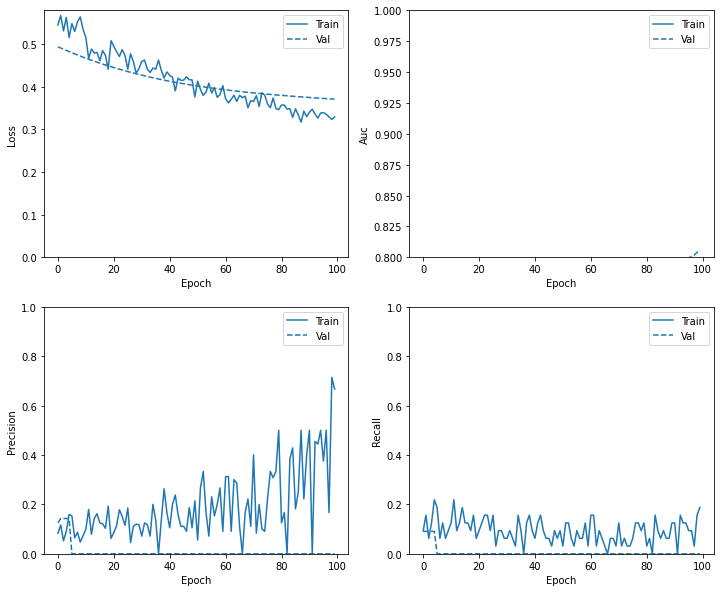

In [211]:
plot_metrics(baseline_history)

In [212]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)

In [213]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

loss :  0.2948852777481079
tp :  0.0
fp :  0.0
tn :  86.0
fn :  8.0
accuracy :  0.914893627166748
precision :  0.0
recall :  0.0
auc :  0.7267441749572754

Legitimate Transactions Detected (True Negatives):  86
Legitimate Transactions Incorrectly Detected (False Positives):  0
Fraudulent Transactions Missed (False Negatives):  8
Fraudulent Transactions Detected (True Positives):  0
Total Fraudulent Transactions:  8


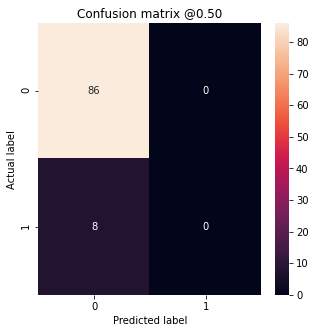

In [214]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

In [215]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,20])
  plt.ylim([80,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

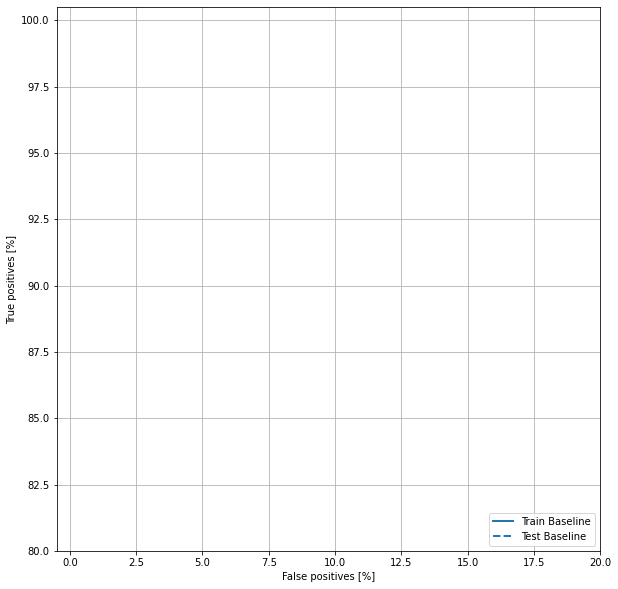

In [216]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

In [217]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.56
Weight for class 1: 4.59


In [218]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight) 

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 0.9699 - tp: 3.0000 - fp: 46.0000 - tn: 307.0000 - fn: 37.0000 - accuracy: 0.7888 - precision: 0.0612 - recall: 0.0750 - auc: 0.5086 - val_loss: 0.4959 - val_tp: 2.0000 - val_fp: 7.0000 - val_tn: 57.0000 - val_fn: 9.0000 - val_accuracy: 0.7867 - val_precision: 0.2222 - val_recall: 0.1818 - val_auc: 0.6562
Epoch 2/100
1/1 [==============================] - 0s 45ms/step - loss: 0.8360 - tp: 6.0000 - fp: 33.0000 - tn: 234.0000 - fn: 26.0000 - accuracy: 0.8027 - precision: 0.1538 - recall: 0.1875 - auc: 0.5820 - val_loss: 0.4955 - val_tp: 2.0000 - val_fp: 8.0000 - val_tn: 56.0000 - val_fn: 9.0000 - val_accuracy: 0.7733 - val_precision: 0.2000 - val_recall: 0.1818 - val_auc: 0.6577
Epoch 3/100
1/1 [==============================] - 0s 46ms/step - loss: 0.8603 - tp: 7.0000 - fp: 49.0000 - tn: 218.0000 - fn: 25.0000 - accuracy: 0.7525 - precision: 0.1250 - recall: 0.2188 - auc: 0.5282 - val_loss: 0.4949 - val_tp: 2.0000 - v

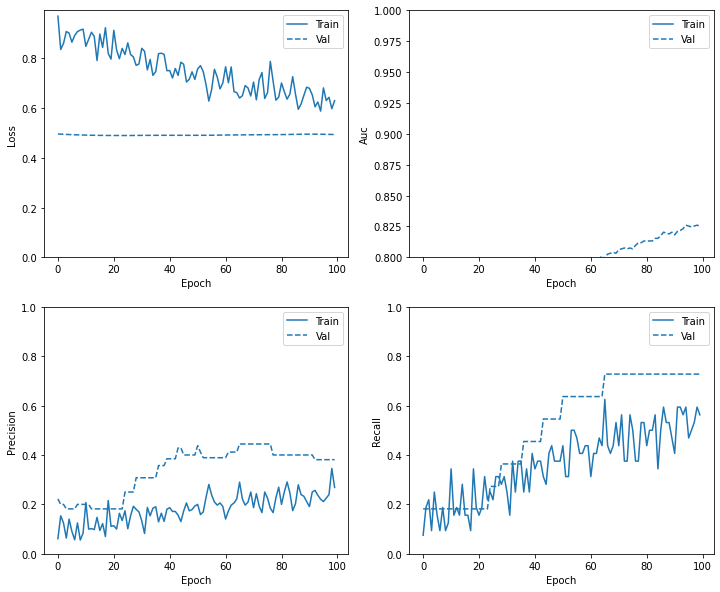

In [219]:
plot_metrics(weighted_history)

In [220]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.5031635165214539
tp :  5.0
fp :  20.0
tn :  66.0
fn :  3.0
accuracy :  0.7553191781044006
precision :  0.20000000298023224
recall :  0.625
auc :  0.7223837375640869

Legitimate Transactions Detected (True Negatives):  66
Legitimate Transactions Incorrectly Detected (False Positives):  20
Fraudulent Transactions Missed (False Negatives):  3
Fraudulent Transactions Detected (True Positives):  5
Total Fraudulent Transactions:  8


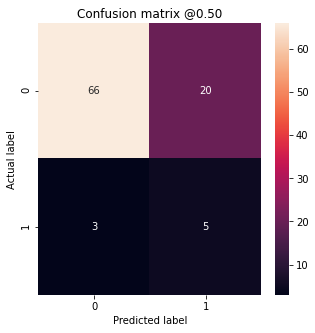

In [221]:
weighted_results = weighted_model.evaluate(test_features, test_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_weighted)

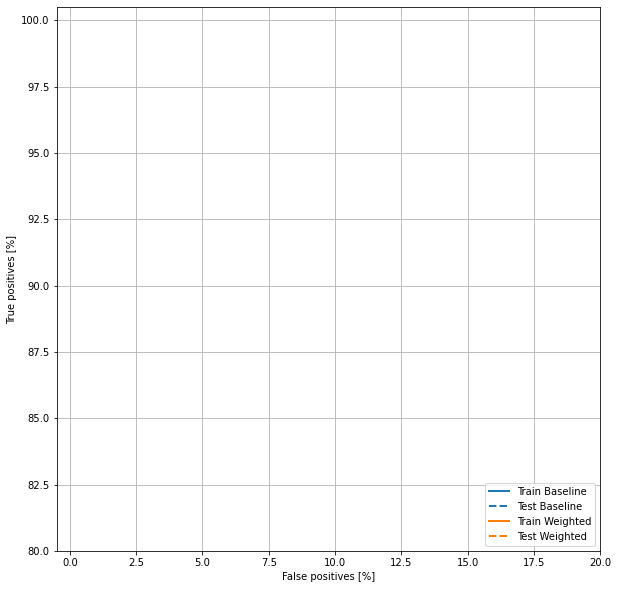

In [222]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right')

In [223]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

In [224]:
ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))

res_pos_features = pos_features[choices]
res_pos_labels = pos_labels[choices]

res_pos_features.shape

(267, 19)

In [225]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape

(534, 19)

In [226]:
BUFFER_SIZE = 100000

def make_ds(features, labels):
  ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
  ds = ds.shuffle(BUFFER_SIZE).repeat()
  return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)

In [227]:
for features, label in pos_ds.take(1):
  print("Features:\n", features.numpy())
  print()
  print("Label: ", label.numpy())

Features:
 [ 1.67156612  2.25780068  0.98925784  1.3696616  -0.5188764  -0.73424798
  0.83022017 -0.02177586 -0.60977463 -0.40983991 -0.59924195 -0.0948624
  0.         -0.17616607 -0.10067341 -0.5207317   1.29089235 -0.63367314
 -1.27100205]

Label:  1


In [228]:
resampled_ds = tf.data.experimental.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

In [229]:
for features, label in resampled_ds.take(1):
  print(label.numpy().mean())

0.4833984375


In [230]:
resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)
resampled_steps_per_epoch

1.0

In [231]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = resampled_model.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks=[early_stopping],
    validation_data=val_ds)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 0.9270 - tp: 954.0000 - fp: 943.0000 - tn: 153.0000 - fn: 92.0000 - accuracy: 0.5168 - precision: 0.5029 - recall: 0.9120 - auc: 0.5367 - val_loss: 1.2965 - val_tp: 11.0000 - val_fp: 64.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.1467 - val_precision: 0.1467 - val_recall: 1.0000 - val_auc: 0.6541
Epoch 2/100
1/1 [==============================] - 0s 56ms/step - loss: 0.9719 - tp: 918.0000 - fp: 967.0000 - tn: 78.0000 - fn: 85.0000 - accuracy: 0.4863 - precision: 0.4870 - recall: 0.9153 - auc: 0.4807 - val_loss: 1.2888 - val_tp: 11.0000 - val_fp: 64.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.1467 - val_precision: 0.1467 - val_recall: 1.0000 - val_auc: 0.6548
Epoch 3/100
1/1 [==============================] - 0s 54ms/step - loss: 0.9328 - tp: 933.0000 - fp: 944.0000 - tn: 84.0000 - fn: 87.0000 - accuracy: 0.4966 - precision: 0.4971 - recall: 0.9147 - auc: 0.4882 - val_loss: 1.

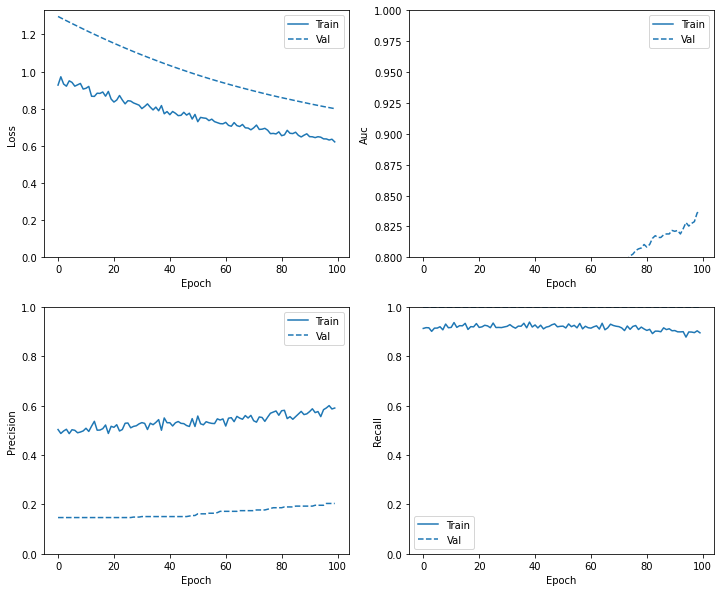

In [232]:
plot_metrics(resampled_history)

In [233]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

resampled_history = resampled_model.fit(
    resampled_ds,
    # These are not real epochs
    steps_per_epoch=20,
    epochs=10*EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_ds))

Epoch 1/1000
20/20 [==============================] - 3s 69ms/step - loss: 0.9343 - tp: 10268.3810 - fp: 10333.0000 - tn: 1018.8095 - fn: 885.2857 - accuracy: 0.4984 - precision: 0.4953 - recall: 0.9196 - auc: 0.4956 - val_loss: 1.1579 - val_tp: 11.0000 - val_fp: 64.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.1467 - val_precision: 0.1467 - val_recall: 1.0000 - val_auc: 0.6889
Epoch 2/1000
20/20 [==============================] - 0s 23ms/step - loss: 0.8466 - tp: 10312.6667 - fp: 9844.6667 - tn: 1418.2857 - fn: 854.8571 - accuracy: 0.5200 - precision: 0.5087 - recall: 0.9236 - auc: 0.5515 - val_loss: 1.0352 - val_tp: 11.0000 - val_fp: 62.0000 - val_tn: 2.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.1733 - val_precision: 0.1507 - val_recall: 1.0000 - val_auc: 0.7436
Epoch 3/1000
20/20 [==============================] - 0s 24ms/step - loss: 0.7702 - tp: 10300.8095 - fp: 9221.1429 - tn: 2030.1905 - fn: 878.3333 - accuracy: 0.5474 - precision: 0.5261 - recall: 0.9219 - a

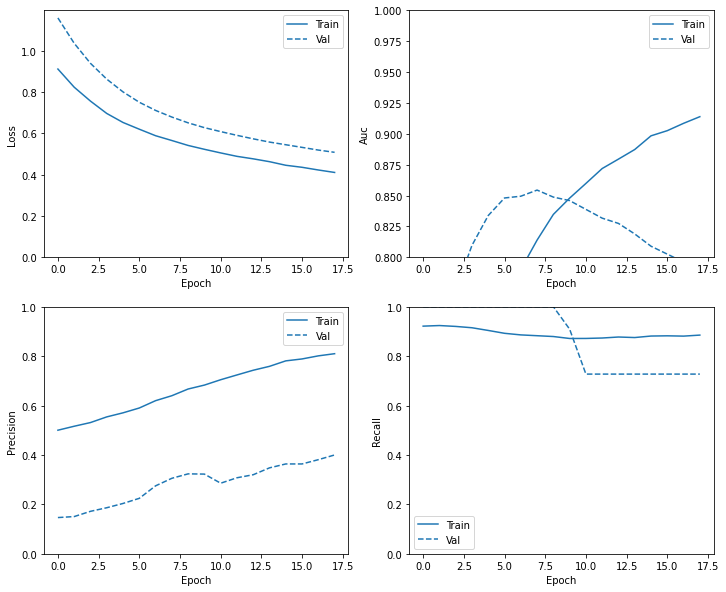

In [234]:
plot_metrics(resampled_history)

In [235]:
train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled = resampled_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.6997072100639343
tp :  6.0
fp :  38.0
tn :  48.0
fn :  2.0
accuracy :  0.5744680762290955
precision :  0.13636364042758942
recall :  0.75
auc :  0.8212209343910217

Legitimate Transactions Detected (True Negatives):  48
Legitimate Transactions Incorrectly Detected (False Positives):  38
Fraudulent Transactions Missed (False Negatives):  2
Fraudulent Transactions Detected (True Positives):  6
Total Fraudulent Transactions:  8


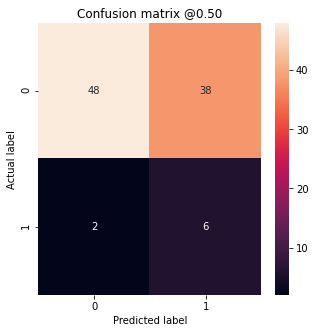

In [236]:
resampled_results = resampled_model.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, resampled_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_resampled)

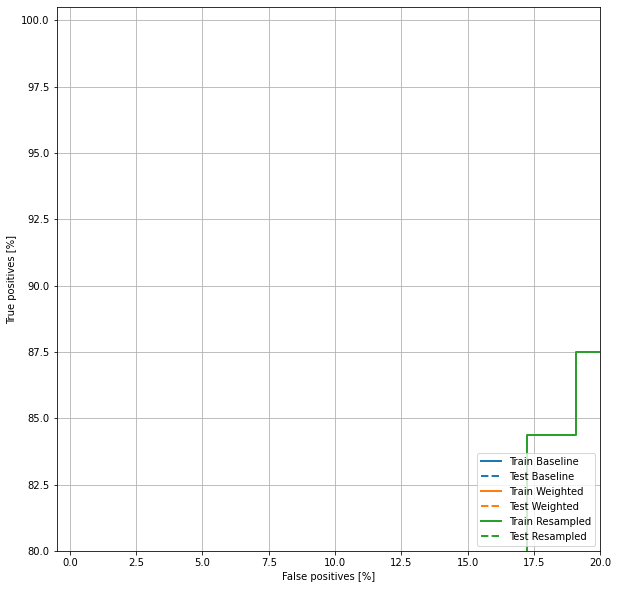

In [237]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_roc("Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
plot_roc("Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right')